# Redes neuronales

La librería que utilizaremos para definir nuestras redes neuronales es tensorflow 2.7.0: https://www.tensorflow.org/?hl=es-419



In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\apacek\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\apacek\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\apacek\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
tensorflow.__version__

'2.7.0'

Los pasos básicos a seguir con tensorflow son:

1. Definimos un modelo: indicamos cantidad y tipos de neuronas.
2. Compilamos el modelo: indicamos función de costo y optimizador.
3. Entrenamos el modelo: cantidad de iteraciones (epochs) y otros parámetros.

Vamos a comenzar trabajando con un dataset sintético simplemente para conocer como trabaja tensorflow.

La siguiente celda simplemente arma el dataset sintético.

In [9]:
from sklearn.datasets.samples_generator import make_blobs, make_moons
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                  random_state=0)

X, y = make_moons(n_samples=1000, random_state=0)

In [7]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


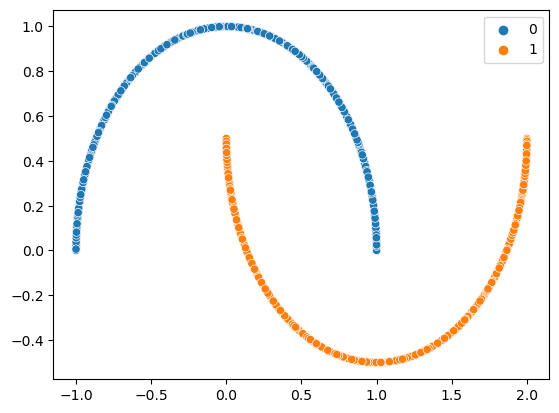

In [10]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Unas de las maneras de definir una red neuronal en tensorflow keras es Sequential.

En sequential, lo que hacemos es definir el modelo de la siguiente manera:

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Lo primero que hicimos fué definir el modelo sequential.

Una vez definido, le vamos agregando capas. En este caso, primero agregamos una capa de 10 neuronas (Dense) con función de activación relu.

Luego, una capa con 1 sola neurona y la función de activación sigmoid.

Tenemos 1 sola capa de salida con sigmoid y esto significa que nuestra salida sera un valor entre 0 y 1.

Ahora debemos definir un optimizador y compilar nuestro modelo:

Uno de los optimizadores más utilizado es Adam.

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:
optimizer = Adam(lr=0.001)

c:\Users\apacek\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Al compliar el modelo, debemos especificar la loss function y podemos también, definir una métrica.

En este caso utilizaremos como loss function: binary_crossentropy.

Binary crossentropy es la loss function más común para problemas de clasificación binaria.

Lo que hace es comparar nuestras predicciones contra el resultado real y penaliza según la distancia que hay entre el resultado esperado y nuestras predicciones.

In [15]:
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])

Ahora ya podemos entrenar nuestro modelo.

Podemos ir guardando los resultados en una variable (history) para futuro análisis.

¿Qué son epochs?

In [16]:
history = model.fit(X, y, epochs=250, validation_split=0.25)

Epoch 1/250
24/24 [==============================] - 2s 28ms/step - loss: 0.6417 - accuracy: 0.7120 - val_loss: 0.6164 - val_accuracy: 0.7560
Epoch 2/250
24/24 [==============================] - 0s 15ms/step - loss: 0.6119 - accuracy: 0.7587 - val_loss: 0.5885 - val_accuracy: 0.8040
Epoch 3/250
24/24 [==============================] - 0s 12ms/step - loss: 0.5834 - accuracy: 0.7880 - val_loss: 0.5609 - val_accuracy: 0.8320
Epoch 4/250
24/24 [==============================] - 0s 10ms/step - loss: 0.5548 - accuracy: 0.8120 - val_loss: 0.5345 - val_accuracy: 0.8480
Epoch 5/250
24/24 [==============================] - 0s 6ms/step - loss: 0.5276 - accuracy: 0.8360 - val_loss: 0.5070 - val_accuracy: 0.8640
Epoch 6/250
24/24 [==============================] - 0s 6ms/step - loss: 0.4999 - accuracy: 0.8547 - val_loss: 0.4807 - val_accuracy: 0.8800
Epoch 7/250
24/24 [==============================] - 0s 6ms/step - loss: 0.4737 - accuracy: 0.8653 - val_loss: 0.4559 - val_accuracy: 0.8840
Epoch 8/2

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Podemos analizar nuestra variable history:

In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


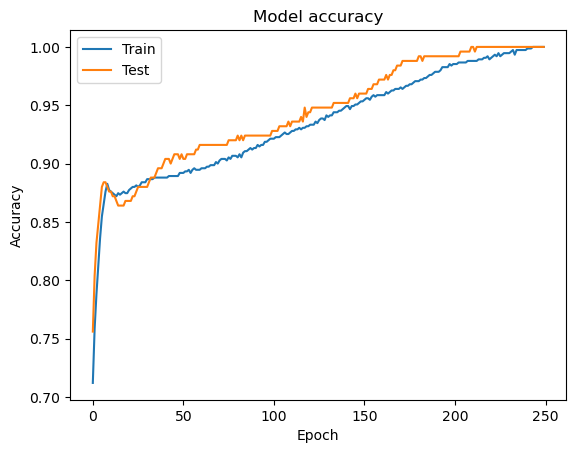

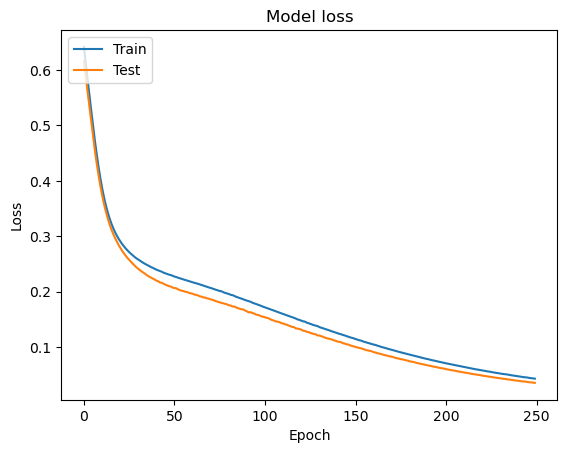

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

¿ Por qué loss baja y accuracy sube ?

El siguiente código plotea las fronteras de decisión.

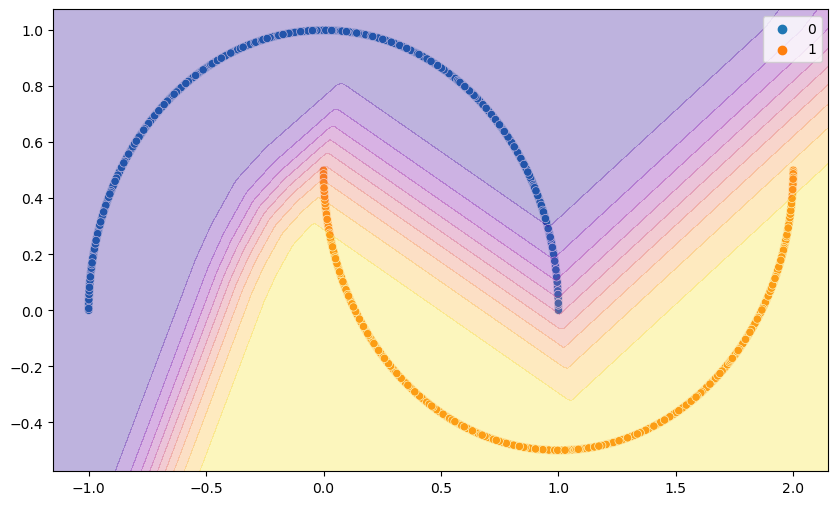

In [20]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

#### Ejercicio

Volver a entrenar una red neuronal y graficar las fronteras de decisión (lo mismo que ya hicimos) pero esta vez agregar una capa más con 10 neuronas.

Es decir, debemos tener 2 capas de 10 neuronas con Relu y luego una capa de 1 neurona con softmax.

Epoch 1/250
24/24 [==============================] - 1s 7ms/step - loss: 0.6108 - accuracy: 0.7187 - val_loss: 0.5177 - val_accuracy: 0.7720
Epoch 2/250
24/24 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8253 - val_loss: 0.3574 - val_accuracy: 0.8240
Epoch 3/250
24/24 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.8560 - val_loss: 0.2737 - val_accuracy: 0.8720
Epoch 4/250
24/24 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.8800 - val_loss: 0.2375 - val_accuracy: 0.8880
Epoch 5/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.8840 - val_loss: 0.2172 - val_accuracy: 0.9080
Epoch 6/250
24/24 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.8893 - val_loss: 0.2065 - val_accuracy: 0.9120
Epoch 7/250
24/24 [==============================] - 0s 4ms/step - loss: 0.2223 - accuracy: 0.8947 - val_loss: 0.1951 - val_accuracy: 0.9120
Epoch 8/250
2

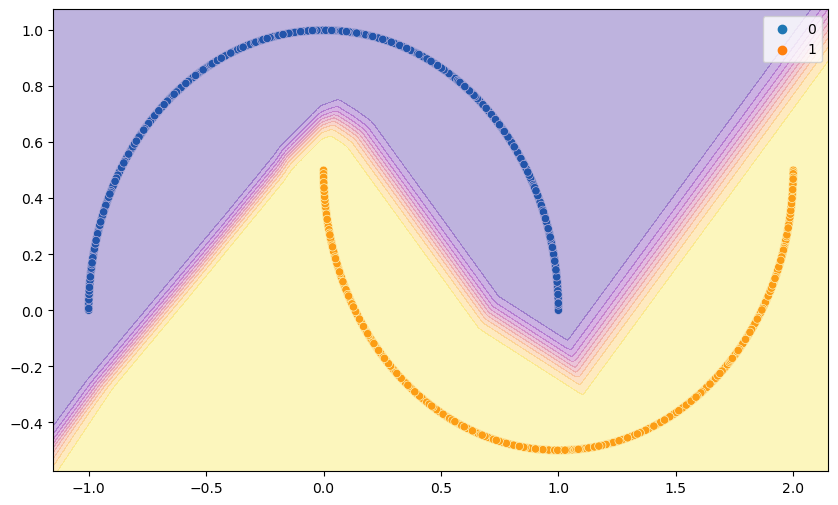

In [21]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X, y, epochs=250, validation_split=0.25)

plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

¿Cambió?

Podemos ver que a medida que agregamos capas y neuronas (modelo más complejo) el modelo se adapta mejor a los datos (ojo con overfitting).


# MNIST

El dataset de MNIST es un dataset muy conocido. Consiste en dígitos escritos a mano. Muchas modelos de redes neuronales son probados primeros en este set. Pueden encontrar una descripción más detallada, y un ranking de modelos con su desempeño, en el siguiente link.

https://en.wikipedia.org/wiki/MNIST_database

Vamos a arrancar con una sola capa, con una activación `softmax`, ya que se trata de diez clases.

En un problema de clasificación con más de 2 clases (no binario) en general utilizaremos softmax en la última capa.

Softmax nos tira un valor entre 0 y 1 para cada uno de los valores de salida. Si sumamos todas las salidas siempre va a ser = 1

In [22]:
from tensorflow.keras.datasets import mnist

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


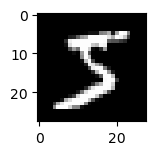

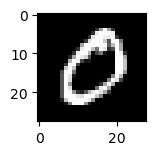

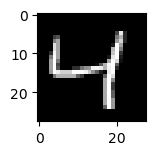

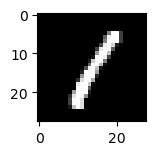

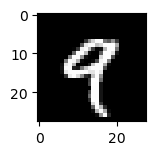

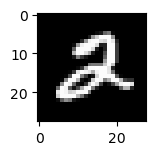

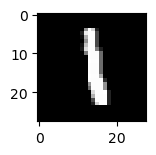

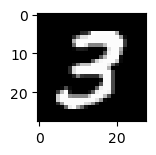

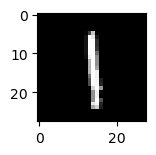

In [24]:
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
y_train.shape

(60000,)

Veamos en que formato está y:

In [27]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Necesitamos convertir esto a un vector de one hot para entrenar nuestra red neuronal.

EJERCICIO:

Aplicar one hot encoder a y (train y test)

In [28]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_train = ohe.fit_transform(y_train.reshape(-1, 1))
y_test = ohe.transform(y_test.reshape(-1, 1))

In [29]:
y_train.shape

(60000, 10)

In [32]:
y_test.shape

(10000, 10)

Cada imagen tiene un tamaño de 28x28. Por lo tanto, debemos "aplanarlas" y convertirlas en una lista de 1 dimensión. Las capas densas esperan recibir una entrada de 1 dimensión.

En tensorflow, podemos utilizar una capa "flatten" para esto.

In [33]:
from tensorflow.keras.layers import Flatten

EJERCICIO:

Definir un modelo que tenga como entrada una capa del tipo Flatten. (definir input_shape).

Luego una capa densa de 128 neuronas y Relu.

Finalmente, la capa de salida. ¿De qué tipo será? ¿Cantidad de neuronas? ¿Función de activación?

In [34]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Ahora compilar el modelo.

Utilizar como optimizer adam (lr de 0.0003), categorical_crossentropy como loss y accuracy como métrica.

In [35]:
optimizer = Adam(lr=0.003)

c:\Users\apacek\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Entrenar por 10 epocas. Setear un validation split de 10%

In [38]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.8552 - accuracy: 0.8142 - val_loss: 0.4246 - val_accuracy: 0.8652
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4826 - accuracy: 0.8788 - val_loss: 0.4236 - val_accuracy: 0.8873
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.5238 - accuracy: 0.8786 - val_loss: 0.3774 - val_accuracy: 0.9058
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5134 - accuracy: 0.8836 - val_loss: 0.3817 - val_accuracy: 0.9220
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5185 - accuracy: 0.8852 - val_loss: 0.4434 - val_accuracy: 0.8937
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5306 - accuracy: 0.8774 - val_loss: 0.4661 - val_accuracy: 0.9202
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.5159 - accuracy: 0.8849 - val_loss: 0.5150 - val_accuracy:

Ploteamos las métricas:

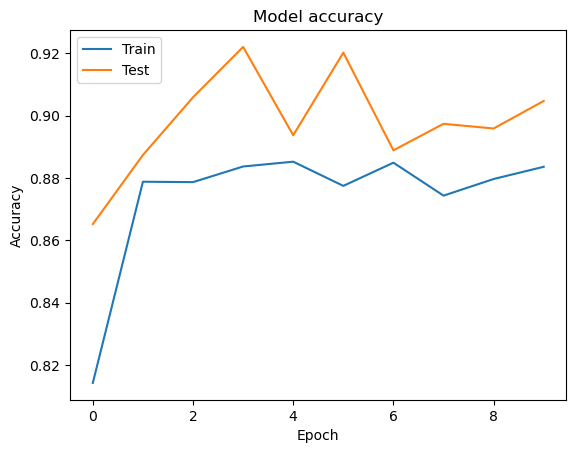

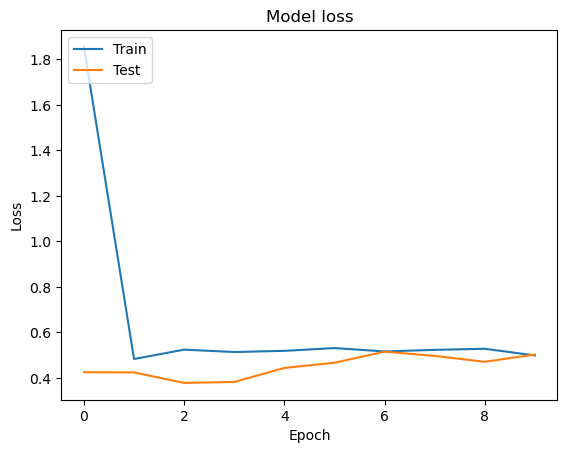

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Con nuestra red neuronal podemos hacer predicciones igual que siempre:

In [40]:
predictions = model.predict(X_test)

In [41]:
predictions[0]

array([4.7554409e-32, 5.2202725e-20, 1.2816812e-05, 1.2957158e-13,
       7.5468451e-12, 0.0000000e+00, 0.0000000e+00, 9.9998713e-01,
       0.0000000e+00, 1.0224895e-11], dtype=float32)

Vemos que no son números enteros sino que son probabilidades y entre todas suman 1.

In [45]:
predictions[0].argmax()

7

In [46]:
y_test[0].argmax()

7

Podemos evaluar:

In [47]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.6901 - accuracy: 0.8861 - 2s/epoch - 5ms/step

Test accuracy: 0.8860999941825867
